In [1]:
1

1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read both csv files

In [4]:
movies = pd.read_csv("../Datasets/tmdb_5000_movies.csv")
credits = pd.read_csv("../Datasets/tmdb_5000_credits.csv")

### Basic Checks

In [6]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [7]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Merge both the df on the column title

In [12]:
df = movies.merge(credits, on='title')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [14]:
# Check duplicated
df.duplicated().sum()

np.int64(0)

In [15]:
# Check null
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

### Feature Engineering

Text(0.5, 1.0, 'Distribution of movie language used')

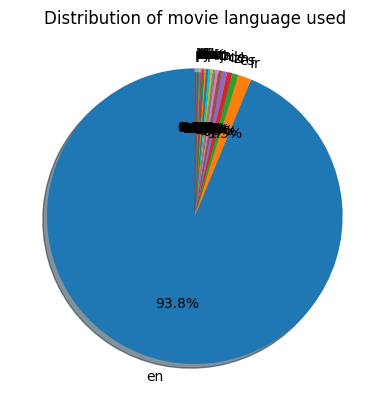

In [21]:
plt.pie(labels= df["original_language"].value_counts().reset_index()["original_language"], 
        x=df["original_language"].value_counts().reset_index()["count"],
        autopct='%1.1f%%',  # Show percentages on the chart
        startangle=90,      # Start the first wedge at 90 degrees
        shadow=True  )
plt.title("Distribution of movie language used")

### Since we don't require homepage & tagline so instead of applying any transformations on those cols just remove unneccary columns.

In [171]:
# budget, genres, movie_id, keywords, overview, popularity, relese_dates,revenue , title, cast, crew

new_df = df[["budget", "genres", "movie_id", "keywords", "overview", "popularity", "release_date","revenue" , "title", "vote_average" , "cast", "crew"]]


In [172]:
new_df.head(1)

,budget,genres,movie_id,keywords,overview,popularity,release_date,revenue,title,vote_average,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [59]:
import nltk

nltk.download('punkt')            # Tokenizer models (word_tokenize, sent_tokenize)
nltk.download('stopwords')        # List of stopwords for different languages
nltk.download('wordnet')          # WordNet lexical database for lemmatization
nltk.download('averaged_perceptron_tagger')  # POS tagger
nltk.download('omw-1.4')  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I573453\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I573453\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\I573453\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\I573453\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\I573453\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### transform genre: it should be list of genres


In [ ]:
from typing import Any, Dict, List
import ast

def convert(genres:str) -> List[str]:
    genres = ast.literal_eval(genres)
    genre_list = [genre["name"].replace(' ', '').lower() for genre in genres]
    
    return genre_list


# convert(new_df["genres"][0])


def get_director(crew:str) -> List[str]:
    directors:List[str] = []
    crew = ast.literal_eval(crew)
    for data in crew:
        if data["job"].lower() == "director":
            directors.append(data["name"].replace(' ', '').lower())
    return directors


In [173]:
new_df["genres"] = new_df["genres"].apply(convert)
new_df["cast"] = new_df["cast"].apply(convert)
new_df["keywords"] = new_df["keywords"].apply(convert)
new_df["crew"] = new_df["crew"].apply(get_director)

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\1491103913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["genres"] = new_df["genres"].apply(convert)
C:\Users\I573453\AppData\Local\Temp\ipykernel_600\1491103913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["cast"] = new_df["cast"].apply(convert)
C:\Users\I573453\AppData\Local\Temp\ipykernel_600\1491103913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [174]:
new_df.dropna(inplace=True)

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [117]:
new_df.head(1)

,budget,genres,movie_id,keywords,overview,popularity,release_date,revenue,title,vote_average,cast,crew
0,237000000,"[action, adventure, fantasy, sciencefiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,Avatar,7.2,"[samworthington, zoesaldana, sigourneyweaver, ...",[James Cameron]


### Basic EDA

Text(0.5, 0.98, 'Distributions of numerical columns')

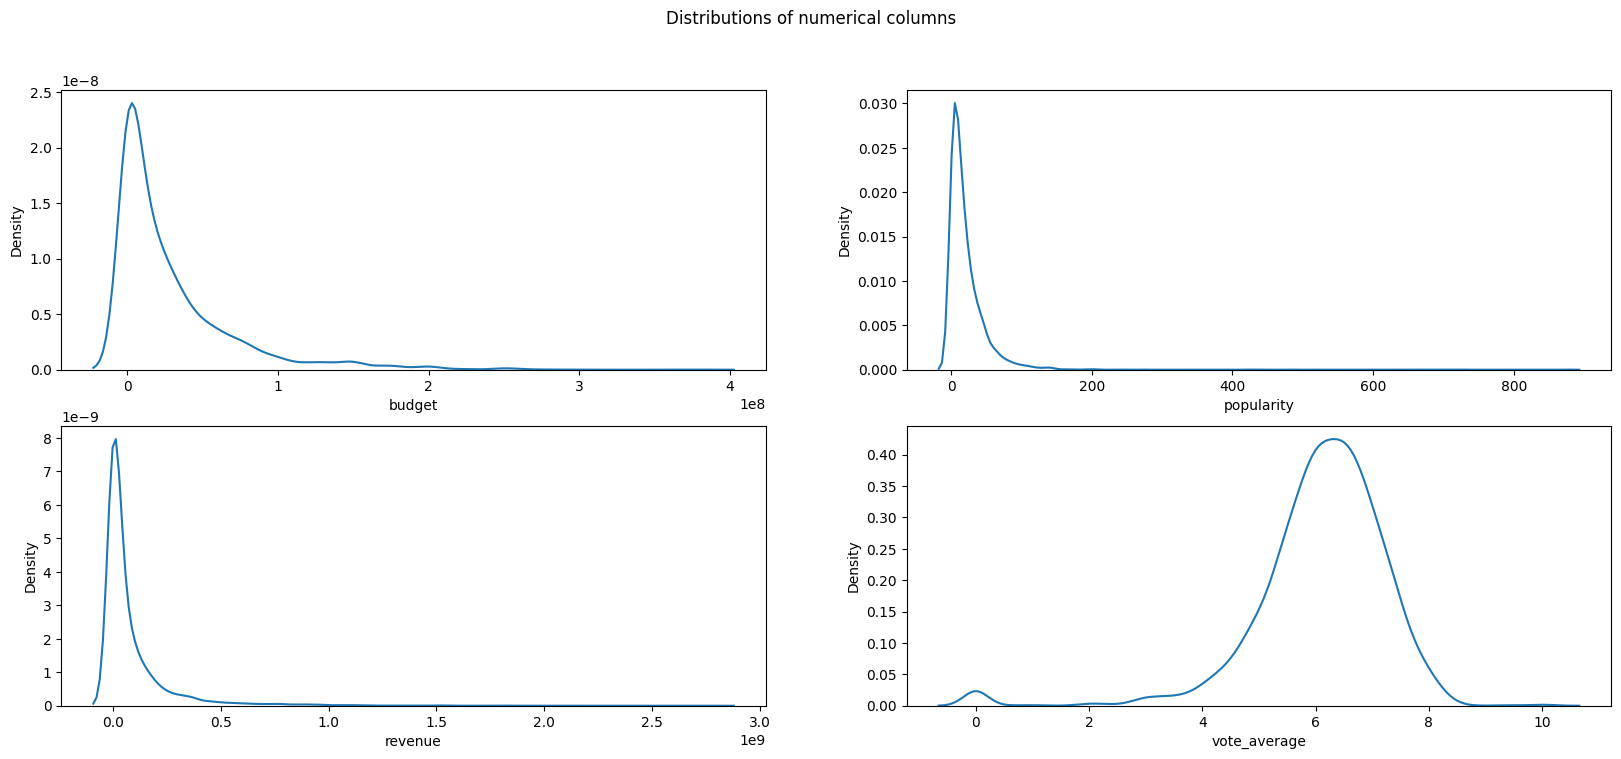

In [126]:
# Budget
numerical_cols = ['budget', 'popularity', 'revenue', 'vote_average']
count = 1
plt.figure(figsize=(20, 8))
for col in numerical_cols:
    plt.subplot(2,2,count)
    count += 1
    sns.kdeplot(x=new_df[col])
plt.suptitle("Distributions of numerical columns")

Text(0.5, 0.98, 'Distributions of Numerical Columns')

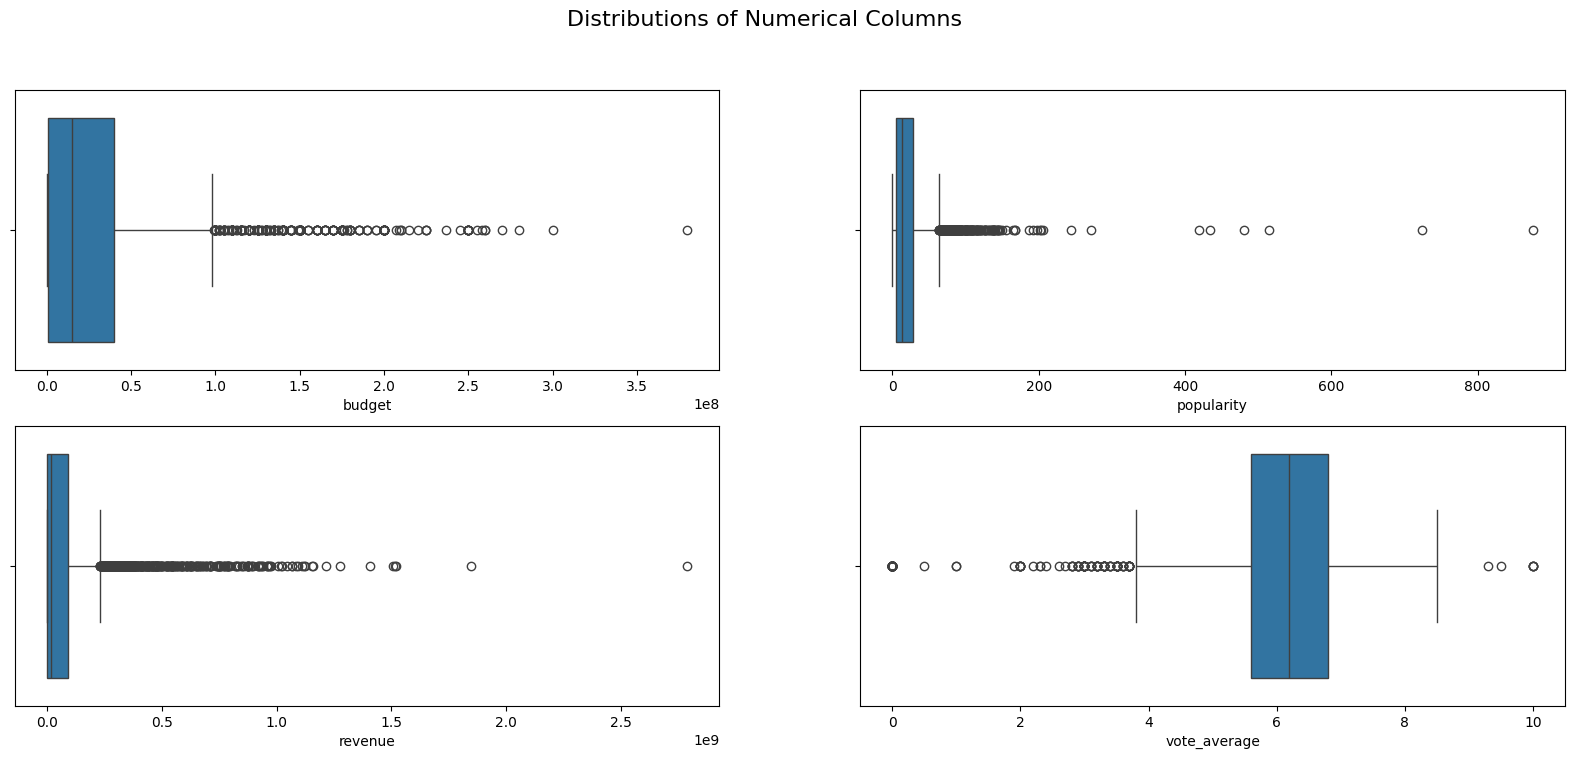

In [125]:
# Budget
numerical_cols = ['budget', 'popularity', 'revenue', 'vote_average']
count = 1
plt.figure(figsize=(20, 8))
for col in numerical_cols:
    plt.subplot(2,2,count)
    count += 1
    sns.boxplot(x=new_df[col])
plt.suptitle("Distributions of Numerical Columns", fontsize=16)

<Axes: >

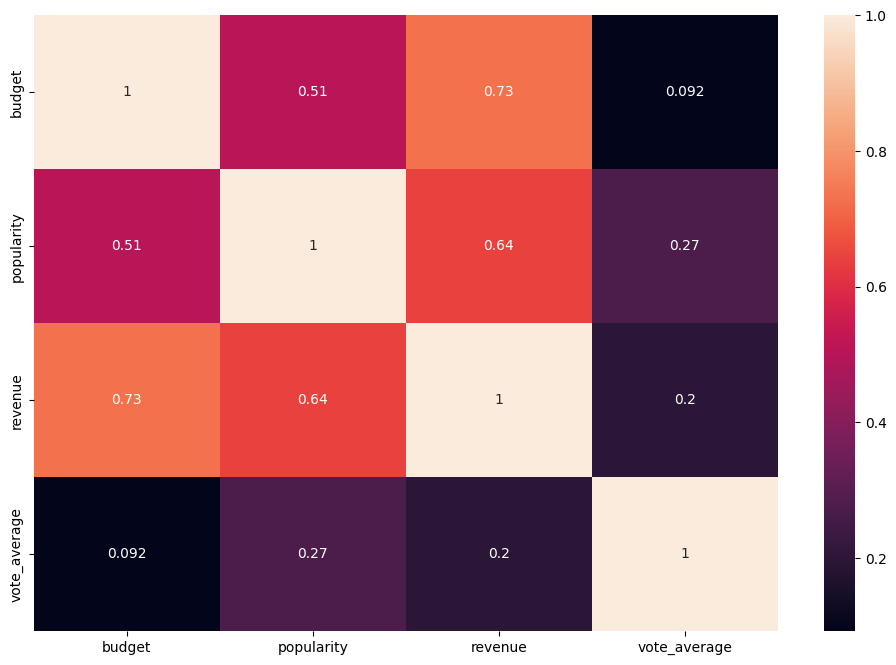

In [123]:
plt.figure(figsize=(12, 8))

sns.heatmap(new_df[numerical_cols].corr(), annot=True)

### popularity Vs revenue

Text(0.5, 1.0, 'popularity Vs revenue distribution')

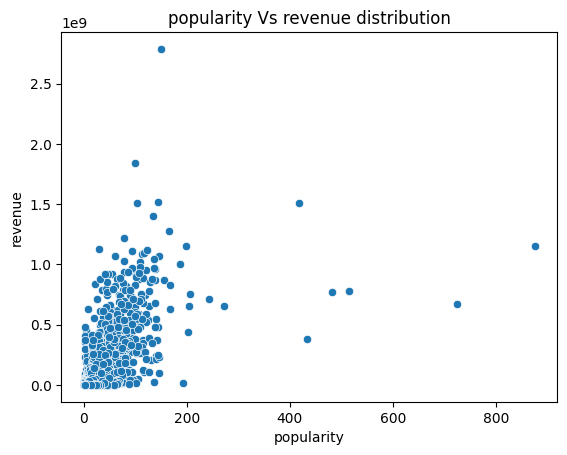

In [129]:
sns.scatterplot(x="popularity", y="revenue", data=new_df)
plt.title("popularity Vs revenue distribution")

In [175]:
new_df["overview"] = new_df["overview"].map(lambda x:x.lower().split())

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\2683288332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["overview"] = new_df["overview"].map(lambda x:x.lower().split())


In [176]:
new_df.head()

,budget,genres,movie_id,keywords,overview,popularity,release_date,revenue,title,vote_average,cast,crew
0,237000000,"[action, adventure, fantasy, sciencefiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[in, the, 22nd, century,, a, paraplegic, marin...",150.437577,2009-12-10,2787965087,Avatar,7.2,"[samworthington, zoesaldana, sigourneyweaver, ...",[James Cameron]
1,300000000,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[captain, barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,"[johnnydepp, orlandobloom, keiraknightley, ste...",[Gore Verbinski]
2,245000000,"[action, adventure, crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[a, cryptic, message, from, bond’s, past, send...",107.376788,2015-10-26,880674609,Spectre,6.3,"[danielcraig, christophwaltz, léaseydoux, ralp...",[Sam Mendes]
3,250000000,"[action, crime, drama, thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[following, the, death, of, district, attorney...",112.312950,2012-07-16,1084939099,The Dark Knight Rises,7.6,"[christianbale, michaelcaine, garyoldman, anne...",[Christopher Nolan]
4,260000000,"[action, adventure, sciencefiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[john, carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,284139100,John Carter,6.1,"[taylorkitsch, lynncollins, samanthamorton, wi...",[Andrew Stanton]


In [177]:
new_df["tags"] = new_df["overview"] + new_df["keywords"] + new_df["genres"] + new_df["cast"] + new_df["crew"]

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\2459623821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["overview"] + new_df["keywords"] + new_df["genres"] + new_df["cast"] + new_df["crew"]


In [178]:
import ast
import string
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_tags(tags:List[str]) -> str:

    # Remove punctuation, lemmatize, and lowercase
    cleaned = []
    for word in tags:
        word = word.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
        if word:  
            cleaned.append(lemmatizer.lemmatize(word.lower()))

    return " ".join(cleaned)

# Example usage
preprocess_tags(new_df["tags"][0])


'in the 22nd century a paraplegic marine is dispatched to the moon pandora on a unique mission but becomes torn between following order and protecting an alien civilization cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d action adventure fantasy sciencefiction samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblainrozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenbmadden josephbradymadden frankietorres austinwilson sarawilson tamicawashingtonmiller lucybriant nathanmeister 

In [179]:
new_df["tags"] = new_df["tags"].map(preprocess_tags)

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\1186580928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].map(preprocess_tags)


### We are keeping movie_id & name just because to return output not for training

In [221]:
final_df = new_df[["movie_id", "title",]]

In [222]:
final_df["title"] = final_df["title"].apply(lambda x:x.lower())

C:\Users\I573453\AppData\Local\Temp\ipykernel_600\231268236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["title"] = final_df["title"].apply(lambda x:x.lower())


### Using Bag of word technique to vectorize

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

In [182]:
vectors = vectorizer.fit_transform(final_df["tags"]).toarray()

In [183]:
print(vectorizer.get_feature_names_out())

['007' '10' '10yearold' ... 'zoëkravitz' 'zucker' 'zwick']


In [191]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)

In [223]:
from typing import List
def recommended_movies(movie_name:str) -> List[str]:
    # movie_name = movie_name.lower()
    # index = final_df[final_df["title"] == movie_name].index[0]
    movie_list = []
    try:
        movie_idx_list = sorted(list(enumerate(similarity[final_df[final_df["title"] == movie_name].index[0]])), reverse=True, key=lambda x:x[1])[1:6]
        for idx in movie_idx_list:
            movie_list.append(final_df.iloc[idx[0]]["title"])


    except Exception as E:
        movie_list = []

    return movie_list

In [224]:
recommended_movies("batman v superman: dawn of justice")

['man of steel',
 'teenage mutant ninja turtles',
 'batman',
 'batman begins',
 'batman & robin']

In [225]:
final_df["title"].head(10)

0                                      avatar
1    pirates of the caribbean: at world's end
2                                     spectre
3                       the dark knight rises
4                                 john carter
5                                spider-man 3
6                                     tangled
7                     avengers: age of ultron
8      harry potter and the half-blood prince
9          batman v superman: dawn of justice
Name: title, dtype: object

In [220]:
final_df.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [226]:
import pickle
pickle.dump(similarity,open('../Models/similarity.pkl','wb'))
final_df.to_pickle("../Models/movie_list.pkl")